In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import TransformedTargetRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [30]:
X, y = make_regression(n_samples=10000, noise=100, random_state=42)
print(X.shape)
print(y.shape)

(10000, 100)
(10000,)


In [31]:
y_exp = np.exp((y+abs(y.min())) / 200)
print(y_exp.shape)

(10000,)


In [34]:
y_trans = np.log1p(y_exp)
print(y_trans.shape)

(10000,)


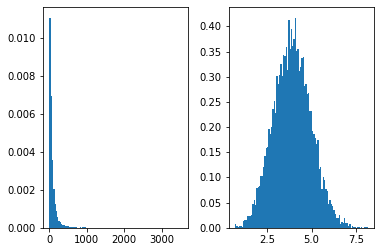

In [47]:
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.hist(y_exp, bins=100, density=True)
ax1.hist(y_trans, bins=100, density=True)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y_exp, random_state=42)

In [41]:
model = RidgeCV()
model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [43]:
model_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    func=np.log1p,
    inverse_func=np.expm1
)
model_trans.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [44]:
y_pred = model.predict(X_test)
y_trans_pred = model_trans.predict(X_test)

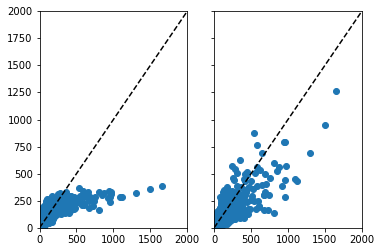

In [52]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
ax0.scatter(y_test, y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])

ax1.scatter(y_test, y_trans_pred)
ax1.plot([0, 2000], [0, 2000], '--k')
ax1.set_xlim([0, 2000])
ax1.set_ylim([0, 2000])
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

In [53]:
print(r2_score(y_test, y_pred))
print(median_absolute_error(y_test, y_pred))

0.3330077932018667
39.5428243609836


In [54]:
print(r2_score(y_test, y_trans_pred))
print(median_absolute_error(y_test, y_trans_pred))

0.6826122147470088
15.092377639193318


TransformedTargetRegressor は↓と同じ処理

In [55]:
model_custom = RidgeCV()
model_custom.fit(X_train, np.log1p(y_train))

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [56]:
y_custom_pred = np.expm1(model_custom.predict(X_test))

In [57]:
print(r2_score(y_test, y_custom_pred))
print(median_absolute_error(y_test, y_custom_pred))

0.6826122147470088
15.092377639193318


log などでスケールを変換することで、精度を改善することができる。